# PREDICTION USING UNSUPERVISED LEARNING!
    

# Heeta Parmar


In [27]:
#importing the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



In [28]:
# importing the dataset
df=pd.read_csv("C:\\Users\Lenovo\Downloads\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:

df.nunique()#gives the value count

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [30]:
df.info()#gives the dtype along with the value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
df.isnull().sum() #checking if any null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [32]:
df.describe() #statistical summary

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


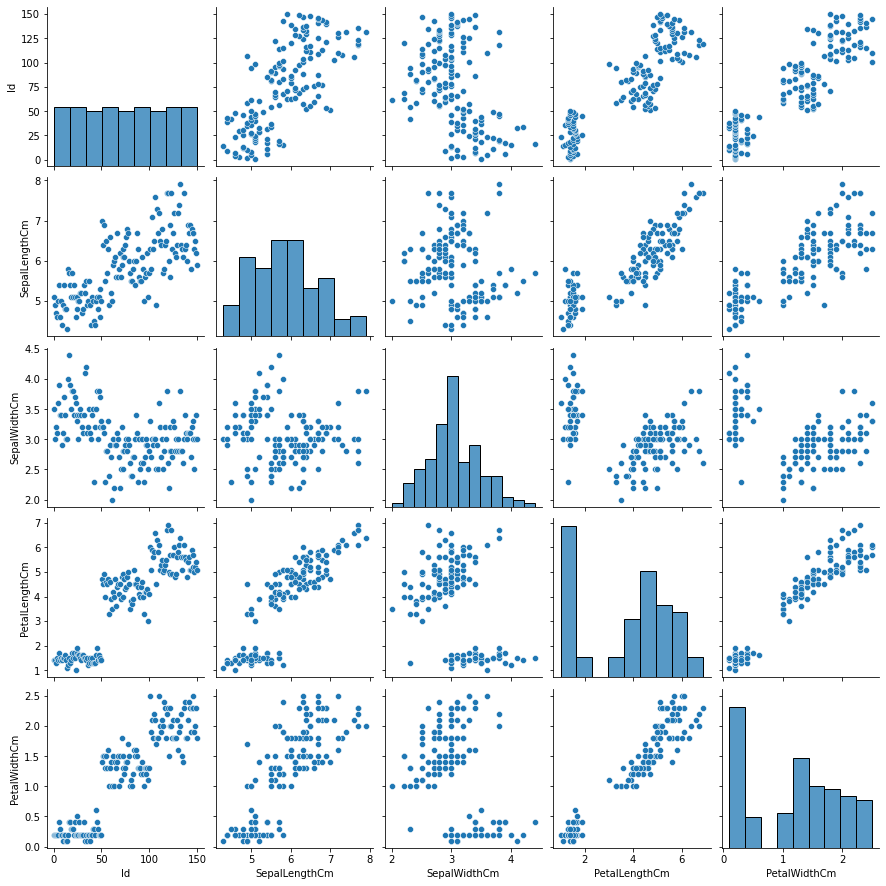

In [33]:
sns.pairplot(data=df)

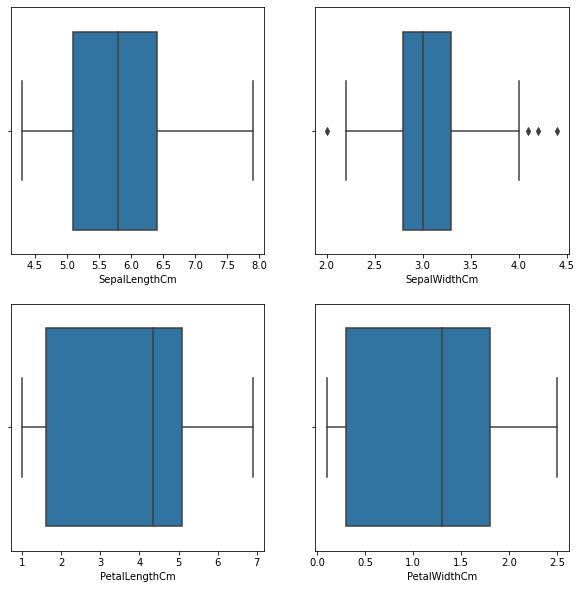

In [34]:
def graph1(x_data):
    sns.boxplot(x=x_data, data=df)

# Code for ploting
plt.figure(figsize=(10,10))  
plt.subplot(221)             
graph1('SepalLengthCm')      

plt.subplot(222)
graph1('SepalWidthCm')

plt.subplot(223)
graph1('PetalLengthCm')

plt.subplot(224)
graph1('PetalWidthCm')

-From the Above graph it is clear that SepalWidth has outliers .And other parameters do not have outliers!



(array([15, 32, 33], dtype=int64),)
(array([60], dtype=int64),)
(array([15, 32, 33], dtype=int64), array([60], dtype=int64))
3.0


<AxesSubplot:xlabel='SepalWidthCm'>

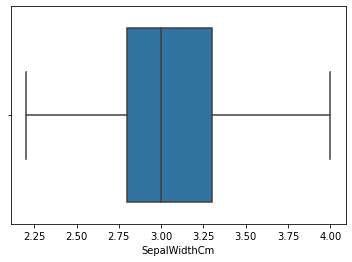

In [35]:

# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25)

Q3 = np.percentile(df['SepalWidthCm'], 75)

IQR = Q3 - Q1

# index of Upper bound outliers
upper_bound_outlier = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
print(upper_bound_outlier)

# index of Lower bound outliers
lower_bound_outlier = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))
print(lower_bound_outlier)

outliers = upper_bound_outlier + lower_bound_outlier
print(outliers)

Median = median(df.SepalWidthCm)
print(Median)

# Imputing the Outliers
for i in outliers:
    df.SepalWidthCm[i] = Median

sns.boxplot(x='SepalWidthCm', data=df)

<AxesSubplot:>

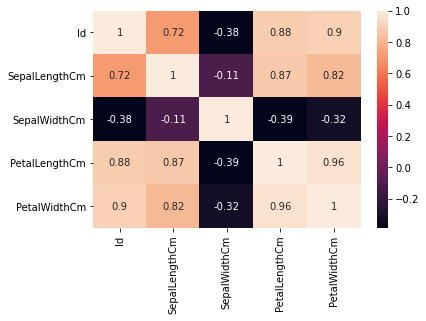

In [43]:
sns.heatmap(df.corr(),annot=True) # This gives us pairwise correalation between variables.

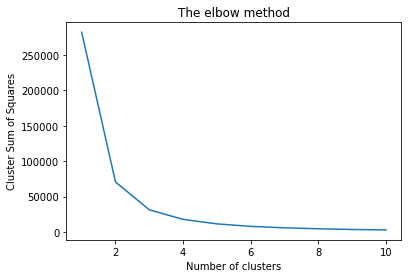

In [39]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') 
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
# Whole dataset except target varible
x = df.iloc[:, :-1].values 
# Our target variable here in this case 'Species'
y = df.iloc[:,   -1].values 

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

[[ 25.5     5.006   3.344   1.464]
 [125.5     6.588   2.974   5.552]
 [ 75.5     5.936   2.79    4.26 ]]


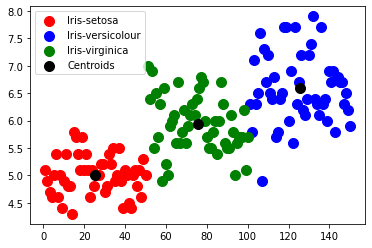

In [41]:

from sklearn.cluster import KMeans

#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 100, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(x)

#display cluster centers
print(kmeans.cluster_centers_) 

#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')  
plt.legend()
plt.show()

# THANK YOU 